# Geração de panorama
## Curso de Fotografia Computacional

### Upload das imagens

Faça o upload de imagens tiradas em sequência **com overlap** das cenas nas imagens.

In [ ]:
#from google.colab.files import upload
#_ = upload()

Ou utilize a partir de um zip no Drive

In [ ]:
%%capture
!unzip drive/MyDrive/fotocomp/stitching_images.zip -d .

### Imports

In [ ]:
import cv2
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
def show_image(img, figsize=(30, 15)):
  fig = plt.figure(figsize=figsize)
  ax = fig.add_subplot(1, 1, 1)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.imshow(img, cmap="gray")
  plt.show()

def show_images(img_list, figsize=None):
  n = len(img_list)
  if figsize == None:
    figsize = (5 * n, 8)
  fig, ax = plt.subplots(1, n, figsize=figsize)
  for i in range(n):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].imshow(img_list[i], cmap="gray")
  plt.show()

### Carregando imagens

In [ ]:
files = glob("stitching_images/*.jpeg") + glob("stitching_images/*.jpg") + glob("stitching_images/*.png") + glob("stitching_images/*.tiff")
files

['stitching_images/3.jpeg',
 'stitching_images/1.jpeg',
 'stitching_images/2.jpeg',
 'stitching_images/5.jpeg',
 'stitching_images/6.jpeg',
 'stitching_images/4.jpeg']

In [ ]:
files = list(sorted(files))
files

['stitching_images/1.jpeg',
 'stitching_images/2.jpeg',
 'stitching_images/3.jpeg',
 'stitching_images/4.jpeg',
 'stitching_images/5.jpeg',
 'stitching_images/6.jpeg']

In [ ]:
ROTATE = True # Troque para falso se não quiser rotacionar as images

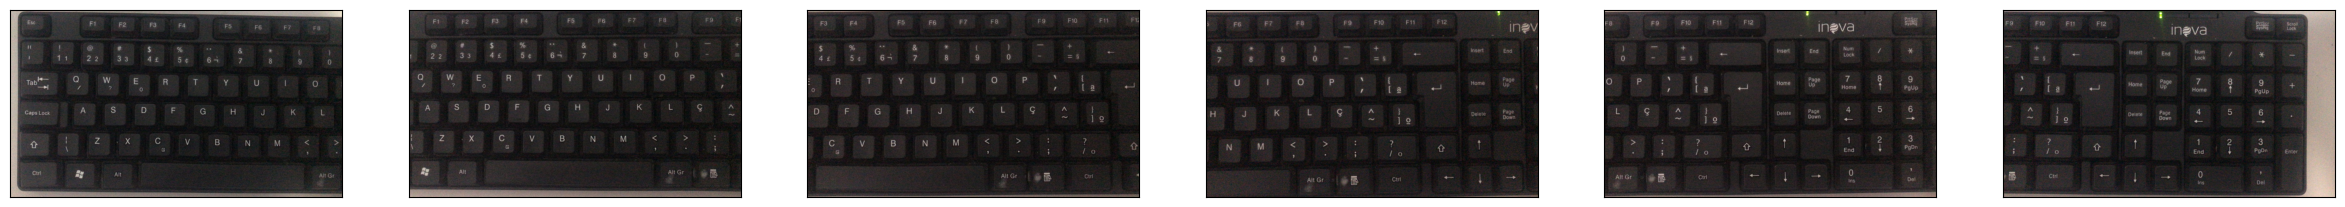

In [ ]:
images_bgr = [cv2.imread(img) for img in files]
images_rgb = [img[..., ::-1] for img in images_bgr]
if ROTATE:
    images_rgb = [np.rot90(img) for img in images_rgb]
show_images(images_rgb)

### Executando o image stitching

In [ ]:
stitcher = cv2.Stitcher_create()

In [ ]:
stitcher = cv2.Stitcher_create()
stitcher.setWaveCorrection(False)
(status, panorama) = stitcher.stitch(images_rgb)

In [ ]:
if status == 0:
    show_image(panorama)
    cv2.imwrite("panorama.jpeg", panorama)
else:
    print(status)